In [4]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Load and Prepare Data
1. Load training and testing datasets.
2. Separate the features (`X`) and target labels (`y`) for both training and testing datasets.

In [5]:
#load data
train_df=pd.read_csv('../cleaned_data/train_data.csv')
test_df=pd.read_csv('../cleaned_data/test_data.csv')

In [6]:
#separate data and label
y_train=train_df['Default']
X_train=train_df.drop(columns=['Default'])
y_test=test_df['Default']
X_test=test_df.drop(columns=['Default'])

## Initialize Gaussian Naive Bayes Model
Define the GaussianNB model for training and evaluation.
## Hyperparameter Tuning with Grid Search
1. Define a parameter grid for `var_smoothing` to smooth the Gaussian Naive Bayes curves.
2. Perform an 8-fold cross-validation to find the best parameters using accuracy as the evaluation metric.

## Evaluate the Model
1. Use the best model from grid search to make predictions on the test dataset.
2. Calculate the accuracy of the predictions.

In [7]:
model=GaussianNB()
#hyperparameter tuning
param_grid={
    'var_smoothing':[1e-11,1e-10,1e-9,1e-8,1e-7]      #stability criterion to smooth the curve
}
grid_search=GridSearchCV(model,param_grid=param_grid,cv=8,scoring='accuracy')
grid_search.fit(X_train,y_train)
best_model=grid_search.best_estimator_
# model.fit(X_train,y_train)

#make predictions
y_pred=best_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8843009594673977

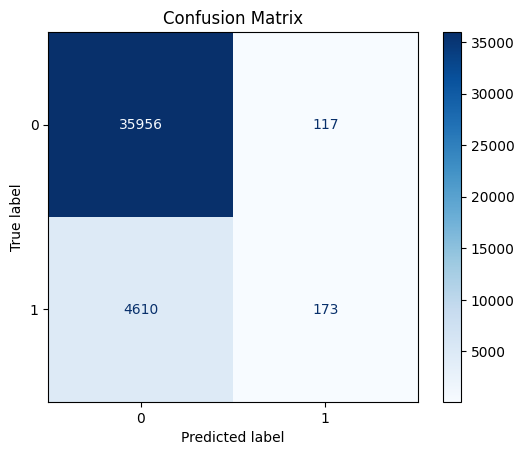

In [8]:
#plot confusion matrix 
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Retrain the Best Model on Combined Data
Retrain the best model using the complete test dataset to utilize all available data.
## Load Final Test Data
1. Load the final test dataset.
2. Extract the `LoanID` column and remove it from the dataset for prediction.

In [9]:
best_model.fit(X_test,y_test) #train the best model on the remaining data
#load final test data 
final_test=pd.read_csv('../data/test.csv')
loan_id_lists=final_test['LoanID']
final_test.drop(columns=['LoanID'],inplace=True)
#one hot encode the test data
final_test=pd.get_dummies(final_test,columns=final_test.select_dtypes(include=['object','category']).columns,dtype=int)

final_pred=best_model.predict(final_test)
#write the prediction 
with open('gaussianNB_predictions.csv','w') as f:
    f.write("LoanID,Default\n")
    for i in range(final_test.shape[0]):
        f.write(f'{loan_id_lists[i]},{final_pred[i]}\n')
